<a href="https://colab.research.google.com/github/Karlajack/MachineLearning2_Advance/blob/main/PCA_cont_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction to PCA
- Principal Component Analysis - It is a dimensionality reduction technique used to reduce the number of variables in a dataset while maintaining as much information as possible.

# 2. Steps involved in PCA
1. Standardize the dataset
2. Compute the covariance Matrix
3. Compute the EigenValues and the Eigenvectors
4. Sort the Eingenvalues and eigenvectors
5. Choose the principal components
6. Transform the data

# 3. Basic PCA Implementation

## Import the libraris

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### Load the dataset annd standardize it

In [ ]:
path = r'C:\Users\Admin\Desktop\Zindua\24f-AdvML\Feature_Engineering_Dim_Red\data\sample_dataset.csv'
df = pd.read_csv(path)
df.head()


,id,name,age,income,purchase_date,product_category,purchase_amount,is_returned
0,e3e70682-c209-4cac-a29f-6fbed82c07cd,Thomas Gonzalez,42.0,92701.95,2021-04-14,Clothing,261.01,1
1,f728b4fa-4248-4e3a-8a5d-2f346baa9455,Christopher Barrett,66.0,67632.79,2021-06-14,Sports,318.51,1
2,eb1167b3-67a9-4378-bc65-c1e582e2e662,Kathy Willis,44.0,22836.08,2021-03-31,Electronics,370.91,0
3,f7c1bd87-4da5-4709-9471-3d60c8a70639,Shannon Bullock,20.0,83378.92,2023-11-04,Clothing,77.07,1
4,e443df78-9558-467f-9ba9-1faf7a024204,Steven Johnson,34.0,44448.31,2020-01-12,Home & Kitchen,256.40,0


In [ ]:
df.drop(columns =['id', 'name', 'purchase_date', 'product_category'], inplace = True)

In [ ]:
df.head()

,age,income,purchase_amount,is_returned
0,42.0,92701.95,261.01,1
1,66.0,67632.79,318.51,1
2,44.0,22836.08,370.91,0
3,20.0,83378.92,77.07,1
4,34.0,44448.31,256.40,0


In [ ]:
df.isnull().sum()

age                100
income              98
purchase_amount    100
is_returned          0
dtype: int64

In [ ]:
df['age'] = df['age'].fillna(df['age'].mean())
df['income'] = df['income'].fillna(df['income'].mean())
df['purchase_amount'] = df['purchase_amount'].fillna(df['purchase_amount'].mean())

In [ ]:
df.isnull().sum()

age                0
income             0
purchase_amount    0
is_returned        0
dtype: int64

In [ ]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [ ]:
### Perform the PCA
pca = PCA(n_components = 2) # Number of components
pca_result = pca.fit_transform(scaled_data)

# Create a dataframe
pca_df = pd.DataFrame(data = pca_result, columns=['Pricipal Comp 1', 'Pricipal Comp 2'])

pca_df

,Pricipal Comp 1,Pricipal Comp 2
0,-0.268964,0.251624
1,-1.322398,-0.409369
2,0.156094,-0.169353
3,0.485972,0.666636
4,0.685048,-0.055134
...,...,...
995,-0.607919,0.616710
996,-0.552680,0.009102
997,-0.394452,0.370939
998,-0.281260,-1.087532


### Explained Variance

In [ ]:
explained_variance = pca.explained_variance_ratio_
print('Explained variance:', explained_variance)

Explained variance: [0.26555634 0.25358177]


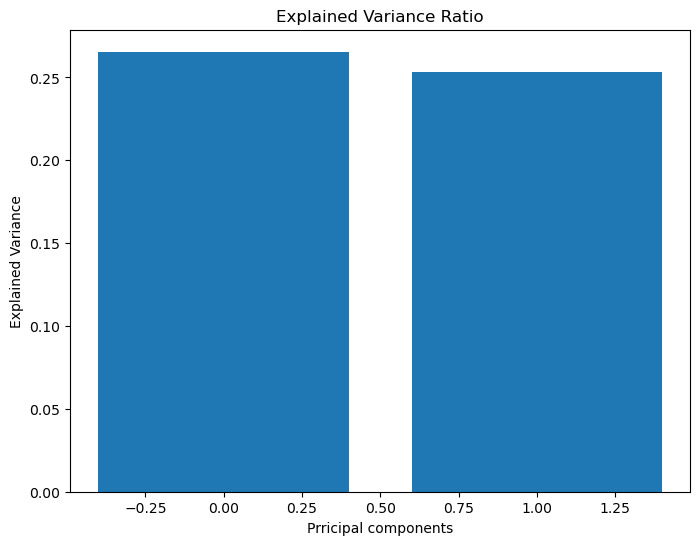

In [ ]:
# Plot the explained Variance
plt.figure(figsize=(8,6))
plt.bar(range(len(explained_variance)), explained_variance)
plt.xlabel("Prricipal components")
plt.ylabel("Explained Variance")
plt.title("Explained Variance Ratio")
plt.show()

### Choosing the number of components

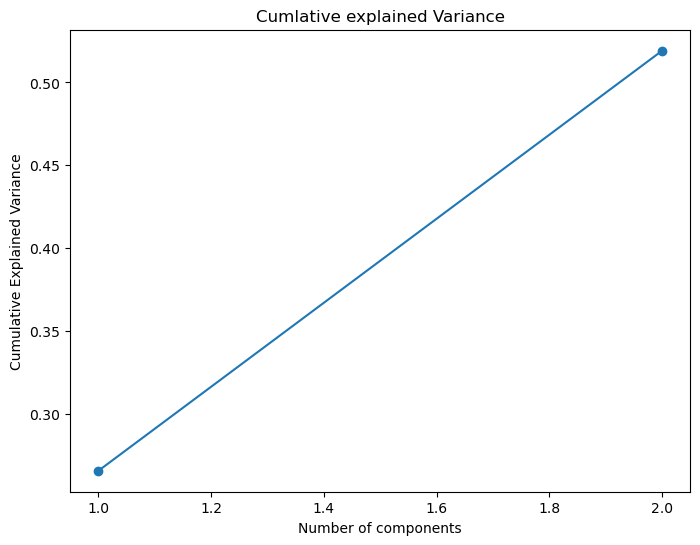

In [ ]:
# Cummulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(8,6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel("Number of components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumlative explained Variance")
plt.show()

In [ ]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

# Explained Variance
explained_variance = pca.explained_variance_ratio_
print("Explained Variance for 3compnents : ", explained_variance)

Explained Variance for 3compnents :  [0.26555634 0.25358177 0.24477143]


### Practice Test

In [ ]:
# Import the libraries needed for PCA

# Load the iris dataset

# Standardize the iris dataset

# Perform PCA with 3 components

# Create a dataframe ith the PCA results

# Visualize the PCA results

In [23]:
# Import the libraries needed for PCA

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Load the iris dataset
from sklearn.datasets import load_iris
data = load_iris()

df = pd.DataFrame(data = data['data'], columns = data['feature_names'])

#df['target'] = data['target']

df.head(2)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [16]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [25]:
### Perform the PCA
pca = PCA(n_components = 3) # Number of components
pca_result = pca.fit_transform(scaled_data)

# Create a dataframe
pca_df = pd.DataFrame(data = pca_result, columns=['Pricipal Comp 1', 'Pricipal Comp 2','Pricipal Comp 3'])

pca_df['target'] = data['target']

pca_df

,Pricipal Comp 1,Pricipal Comp 2,Pricipal Comp 3,target
0,-2.264703,0.480027,-0.127706,0
1,-2.080961,-0.674134,-0.234609,0
2,-2.364229,-0.341908,0.044201,0
3,-2.299384,-0.597395,0.091290,0
4,-2.389842,0.646835,0.015738,0
...,...,...,...,...
145,1.870503,0.386966,0.256274,2
146,1.564580,-0.896687,-0.026371,2
147,1.521170,0.269069,0.180178,2
148,1.372788,1.011254,0.933395,2


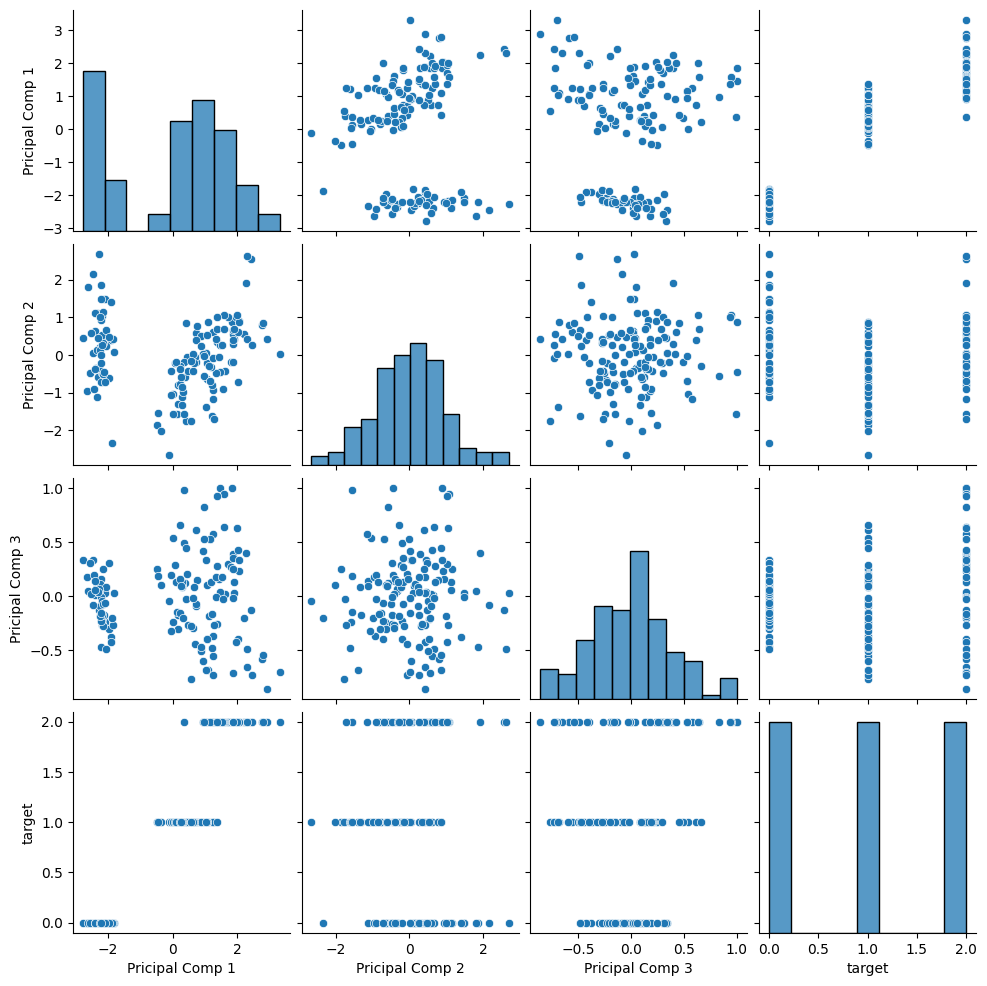

In [36]:
# Plot the result
##sns.scatterplot(x="Pricipal Comp 1", y='Pricipal Comp 2', hue = "target", palette='coolwarm', data = pca_df, legend = 'full')
##plt.title("PCA of iris data Dataset")
##plt.show()

sns.pairplot(pca_df)
plt.show()



# Explained Variance

In [37]:
explained_variance = pca.explained_variance_ratio_
print('Explained variance:', explained_variance)

Explained variance: [0.72962445 0.22850762 0.03668922]


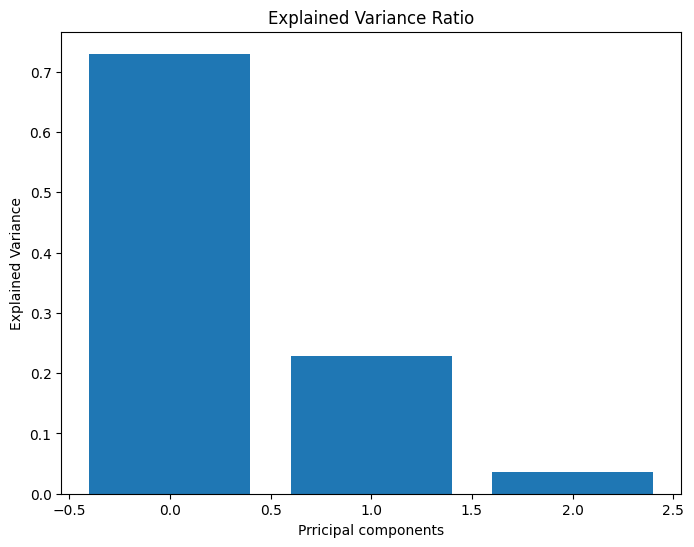

In [38]:
# Plot the explained Variance
plt.figure(figsize=(8,6))
plt.bar(range(len(explained_variance)), explained_variance)
plt.xlabel("Prricipal components")
plt.ylabel("Explained Variance")
plt.title("Explained Variance Ratio")
plt.show()

Choosing the number of components

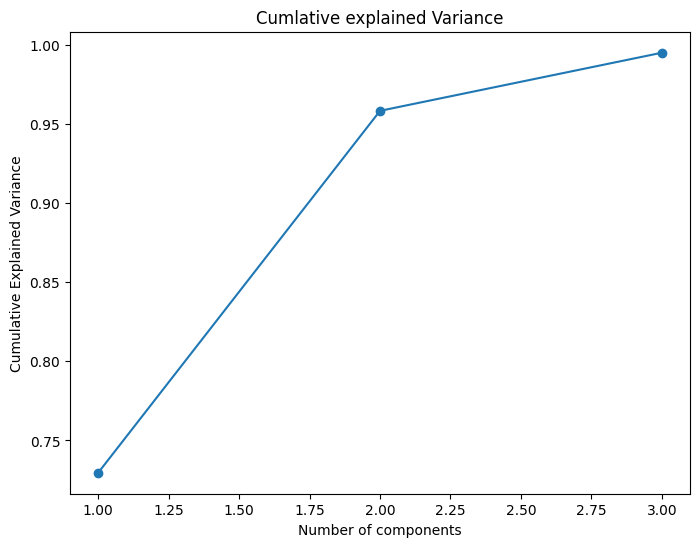

array([0.72962445, 0.95813207, 0.99482129])

In [42]:
# Cummulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(8,6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel("Number of components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumlative explained Variance")
plt.show()
cumulative_variance